# Participant Matcher
This notebook selects the timestamps from the ibex farm participants and matches them up with the corresponding participant on pavlovia

In [17]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns
import datetime

sns.set(palette="bright")
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

In [18]:
## Data in

#read in source csv (Pavlovia)
df_p = pd.read_csv(r'data/results_pavlovia.csv', encoding='utf-8-sig', 
                  low_memory=False
                 )

# Exclude Participants 
p_exclude= [5,  15,  20,  22,  36,  37,  42,  45,  47,  49,  51,  53,  56, 79, 90, 167, 168, 64, 180, 99, 167,
            71,121, 57,77,97, 197,182, 63,73,88,103,113,138,163,183
           ] # 5 was me, 47 performed bad
for p in p_exclude:
    df_p = df_p[df_p['participant'] != p] 

# now the actual 50 participants are left

In [19]:
# display column names
print(list(df_p.keys()))

['training.ran', 'SJ_trials_between.ran', 'imagePath2', 'response_distortion.corr', 'key_resp.keys', 's_adjust.thisIndex', 'id', 'group', 'cont_2.rt', 'exit.rt', 'latency', 'response_sync.rt', 'SJ_trials_skip.ran', 'training.thisN', 's_adjust.thisTrialN', 'OS', 'cont_5.rt', 'item', 'response_distortion.keys', 'trials.ran', 'cont_6.keys', 'frameRate', 'block_counter_sj', 'SJ_trials_before.thisIndex', 'SJ_trials_skip.thisTrialN', 'echo', 'psychopyVersion', '__session', 'response_sync.keys', 'response_sync.corr', 'trials.thisN', '__participant', 's_adjust.thisRepN', 'cont_1.rt', 'SJ_trials_after.thisIndex', 'key_resp.rt', 'SJ_trials_before.thisN', 'attribute1', 'response_distortion.rt', 'cont_2.keys', 'cont_3.rt', 'entity2', 'SJ_trials_between.thisTrialN', 'block_counter_choice', 'cond', 'Name_optional', 'researcher', 'corrAns_choice', 'trial_counter_sj', 'cont_7.rt', 'SJ_trials_skip.thisN', 'trial_counter_training', 'sentence', 'training.thisIndex', 'attribute2', 'choice_response.keys', 

In [20]:
#get timestamps for each participant
df_p.groupby(['participant'])['__datetime'].unique()

participant
59     [2021-04-19_17h40.49.040]
60     [2021-04-20_12h00.00.996]
76     [2021-04-27_19h46.33.888]
82     [2021-04-28_08h52.58.364]
83     [2021-04-28_09h15.05.134]
89     [2021-04-28_11h54.18.717]
91     [2021-04-28_12h05.40.183]
94     [2021-04-28_16h03.09.987]
98     [2021-04-29_09h40.03.047]
101    [2021-04-29_18h12.50.939]
102    [2021-04-29_19h20.06.861]
107    [2021-04-30_12h10.54.780]
108    [2021-04-30_14h40.45.401]
110    [2021-04-30_15h40.15.987]
112    [2021-05-01_12h18.48.758]
114    [2021-05-01_21h09.40.914]
120    [2021-05-02_21h51.44.312]
122    [2021-05-03_08h56.55.758]
123    [2021-05-04_12h30.23.292]
127    [2021-05-05_17h31.03.627]
139    [2021-05-15_16h37.30.127]
143    [2021-05-16_20h54.28.567]
148    [2021-05-17_12h07.26.784]
150    [2021-06-18_13h53.12.526]
151    [2021-05-17_23h51.12.628]
152    [2021-05-22_08h16.55.436]
154    [2021-05-18_11h53.32.385]
155    [2021-05-18_13h27.30.150]
162    [2021-05-19_15h28.23.265]
166    [2021-05-21_16h05.24.086

In [21]:
# drop ms and add a timestamp column
df_p["timestamp"] = [datetime.datetime.strptime(i[:i.rfind(".")], "%Y-%m-%d_%Hh%M.%S") for i in df_p["__datetime"]]

In [22]:
#read in questionnaire data
df_q = pd.read_csv('data/results_audiovisual_exp.txt',
                 sep = ',',
                 comment='#', 
                 header=None,
                 names = ['time','hash', 'controller','item','element', 'type', 'group','petype','pename','parameter', 'value', 'event_time', 'comments'],
                engine = 'python')

In [23]:
# reformat unix time into timestamp and add as column
df_q['timestamp'] = [datetime.datetime.fromtimestamp(i) for i in df_q['time']]

In [24]:
# remove duplicates and get hash values, which are the ip address, so there will still be duplicates 
# also change timezone if necessary
df_q_ts = df_q.drop_duplicates(subset=["timestamp"])
df_q_ts.loc[:,"timestamp"] = df_q_ts.loc[:,"timestamp"] + datetime.timedelta(hours=0)
df_q_ts = df_q_ts.set_index("timestamp")
df_q_ts

C:\Users\aron\.conda\envs\ba\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,time,hash,controller,item,element,type,group,petype,pename,parameter,value,event_time,comments
timestamp,,,,,,,,,,,,,
2021-02-11 17:46:26,1613061986,ee0c84657bbc38a161c37ae43638c9d0,Form,2,0,intro,NaN,_REACTION_TIME_,5053,None,None,NaN,None
2021-02-11 17:51:19,1613062279,ee0c84657bbc38a161c37ae43638c9d0,Form,2,0,intro,NaN,_REACTION_TIME_,26796,None,None,NaN,None
2021-02-12 11:06:03,1613124363,8204ea5b0420deed16547874f12477f9,Form,2,0,intro,NaN,_REACTION_TIME_,8413,None,None,NaN,None
2021-02-23 12:01:32,1614078092,60c140bf653fbd45c3ca2a179544e1f8,PennController,1,0,intro1,NaN,PennController,0,_Trial_,Start,1.614078e+12,NaN
2021-02-23 12:07:07,1614078427,60c140bf653fbd45c3ca2a179544e1f8,PennController,1,0,intro1,NaN,PennController,0,_Trial_,Start,1.614078e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-09 19:58:04,1623261484,da70a9429d0d9a8e958bb523f526e9bc,PennController,1,0,intro1,NaN,PennController,0,_Trial_,Start,1.623143e+12,NaN
2021-06-09 22:13:15,1623269595,3d87911add9d275f4a9d3e1e09aeecf8,PennController,1,0,intro1,NaN,PennController,0,_Trial_,Start,1.622898e+12,NaN
2021-06-09 22:21:45,1623270105,3a45a91a0eb609244e30b512f5c3f265,PennController,1,0,intro1,NaN,PennController,0,_Trial_,Start,1.623270e+12,NaN


In [25]:
# set timestamp as index so we can search by index
df_p_participants = df_p.drop_duplicates(subset=["timestamp"])[["participant", "timestamp"]].set_index("participant")
df_p_participants

,timestamp
participant,
59,2021-04-19 17:40:49
60,2021-04-20 12:00:00
76,2021-04-27 19:46:33
82,2021-04-28 08:52:58
83,2021-04-28 09:15:05
89,2021-04-28 11:54:18
91,2021-04-28 12:05:40
94,2021-04-28 16:03:09
98,2021-04-29 09:40:03


In [26]:
# for each participant in the questionnaire, find the next matching timestamp on pavlovia, adjust tolerance if necessary
participant_hash = {}
print('part ID', '    ibex timestamp', '     pavlovia timestamp', '     hash id ibex')
for participant, timestamp in list(zip(df_p_participants.index, df_p_participants["timestamp"])):
    try:
        index = df_q_ts.index.get_loc(timestamp, method='ffill', tolerance=datetime.timedelta(minutes=40))
    except KeyError:
            print(participant, " | ", ' nothing found       | ', timestamp, " | ", "no match")
    else:
        hashcode = df_q_ts.iloc[index]["hash"]
        q_timestamp = df_q_ts.iloc[index].name
        print(participant, " | ", q_timestamp," | ", timestamp, " | ", hashcode)
        participant_hash[participant] = hashcode

part ID     ibex timestamp      pavlovia timestamp      hash id ibex
59  |  2021-04-19 17:34:58  |  2021-04-19 17:40:49  |  ac4f0c2927af77c85bb20204f324f03e
60  |  2021-04-20 11:59:31  |  2021-04-20 12:00:00  |  d0814e2e5ea90547f53f979d7e213e11
76  |  2021-04-27 19:46:14  |  2021-04-27 19:46:33  |  ed557ca72379f3af709175a11ca285f7
82  |  2021-04-28 08:52:10  |  2021-04-28 08:52:58  |  85cced2f3e70b468136a818d22e82aa2
83  |  2021-04-28 09:14:41  |  2021-04-28 09:15:05  |  52410a627d876d3ea6dca8044452db5d
89  |  2021-04-28 11:48:57  |  2021-04-28 11:54:18  |  58d50698a3ceddb703d5371ffd0027d4
91  |  2021-04-28 12:05:29  |  2021-04-28 12:05:40  |  ed31f1f2fe430d1021c8578ce6a4934c
94  |  2021-04-28 16:02:52  |  2021-04-28 16:03:09  |  0999c60331b1561f4fb890a1f8b34145
98  |  2021-04-29 09:39:20  |  2021-04-29 09:40:03  |  6eaef256c294ca0ee55c4f6f9cd891ff
101  |  2021-04-29 18:12:32  |  2021-04-29 18:12:50  |  3a877fe2ec0fb1639b3c2b00169967e3
102  |  2021-04-29 19:19:19  |  2021-04-29 19:20:0

In [27]:
print(len(participant_hash))
df = df_q[df_q["hash"].isin(participant_hash.values())]

45


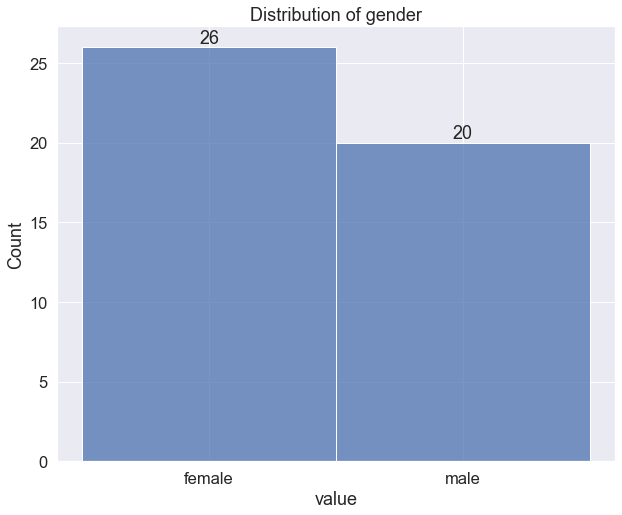

In [28]:
#display all the genders
list(df[df['parameter'] == 'gender']['value'])
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'gender'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Distribution of gender')

plt.savefig("figures/gender_dist.png", dpi=192, bbox_inches='tight')

In [29]:
ages = df[df['parameter'] == 'age'].sort_values(by='value')
ages = ages[ages['value'] != '333']
ages = ages[ages['value'] != '14']
ages = ages[ages['value'] != '11']
agelist = list(ages['value'])
agelist = list(map(int, agelist))
mean = np.mean(agelist)
print(agelist)
print(mean)

[19, 19, 19, 19, 19, 19, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 30, 32, 51, 56]
24.155555555555555


['time', 'hash', 'controller', 'item', 'element', 'type', 'group', 'petype', 'pename', 'parameter', 'value', 'event_time', 'comments', 'timestamp']


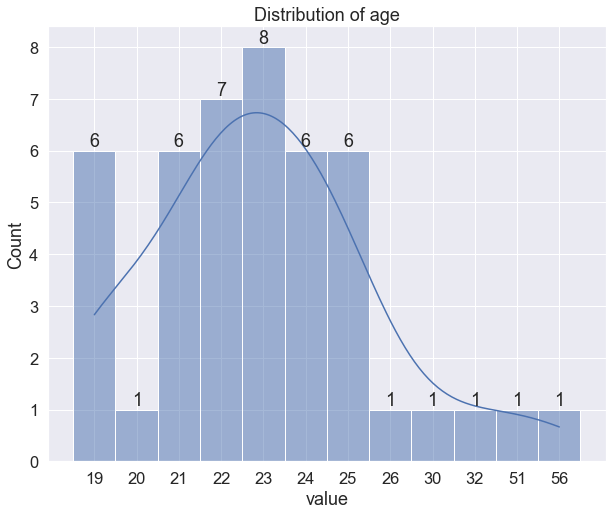

In [30]:
#display all the ages
print(list(ages))
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)


ax = sns.histplot(x = ages['value'],
                 kde = True)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title('Distribution of age')
plt.savefig("figures/age_dist.png", dpi=192, bbox_inches='tight')

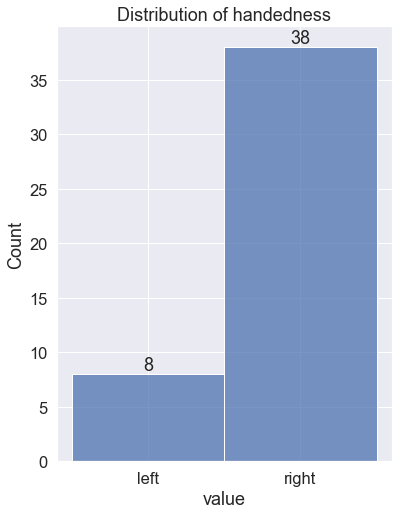

In [31]:
fig = plt.gcf()
fig.set_size_inches(6, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'handedness'],x = 'value')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


plt.title('Distribution of handedness')
plt.savefig("figures/handedness_dist.png", dpi=192, bbox_inches='tight')

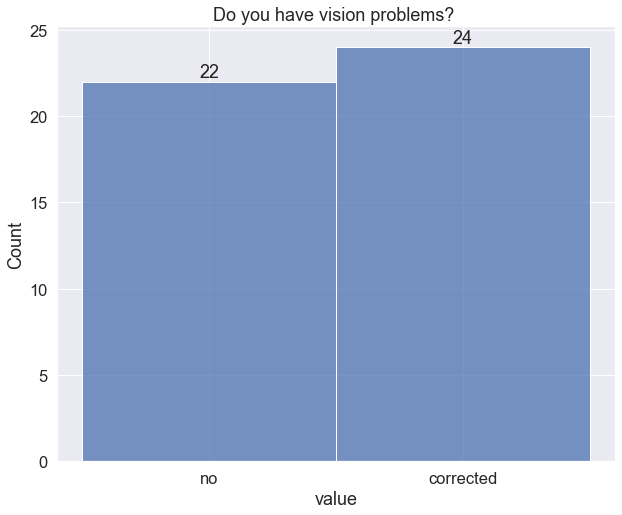

In [32]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'vision'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Do you have vision problems? ')

plt.savefig("figures/vision_dist.png", dpi=192, bbox_inches='tight')